# Reservoir Computing Networks

Reservoir Computing Networks are a class of recurrent neural networks (RNNs) designed for processing sequential data, particularly suited for tasks like time-series prediction, pattern recognition, and signal processing. What sets RC apart from traditional RNNs is its unique architecture, characterized by a fixed recurrent layer known as the reservoir. In this report, we conducted an analysis of reservoir computing for classification tasks using a custom-built classifier. The classifier, implemented as a function named `reservoir_class`, takes various parameters to configure the network architecture and training procedure. This function was employed to assess the performance of reservoir computing models on different datasets and under varying conditions and looking for the best model.

The `reservoir_class` function is designed to handle classification tasks on two specific datasets: '5s' and 'lvr'. For the '5s' dataset, the function supports linear ('lin') and logistic ('log') regression classifiers. Meanwhile, for the 'lvr' dataset, only logistic regression ('log') and 1-nearest neighbor ('1nn') classifiers are supported. However, in this analysis, we were given only one dataset `dataSorted_allOrientations.mat`, thus we can only investigate '5s' and 'lin' regression. The dataset consists of the LFP collected from 128 electrodes, it is separated by trial. It has all together 5 states - Baseline, Pre-grasp, Reach, Grasp, Post-grasp. Each trial has a duration of roughly 0.25 seconds (508 samples). Moreover, there were 140 trials in total resulting in an input matrix of size [128,508,140,5].

During the analysis, we explored different combinations of parameters, including the number of nodes in the reservoir layer, input probability, and reservoir probability. These parameters play a crucial role in shaping the behavior and performance of the reservoir computing model. The results and their description is more described in the report.

To evaluate the performance of the classifier, we utilized a training-testing split of 80%-20% and computed the accuracy of the model on the test data. The accuracy metric provides insights into how well the classifier generalizes to unseen data and serves as a measure of the model's predictive capability.

Furthermore, we conducted an analysis of the variance of accuracy across different parameter settings. By grouping the data based on specific parameters such as the number of nodes or input probability, we investigated how variability in these factors impacts the performance of the classifier. Visualizations, including plots of accuracy variance, were employed to illustrate these findings and aid in the interpretation of results.

Lastly, we identified the optimal parameter settings by determining the maximum accuracy achieved for each group of parameters. This information is valuable for guiding future experiments and refining the reservoir computing model to achieve the best possible performance. Overall, this analysis highlights the importance of parameter selection in optimizing model performance.

**Note: All the functions are defined in `reservoir.py`.**

In [1]:
# =========== IMPORT LIBRARIES ============
import sys
import numpy as np
import network as Network_library
import data as Data
import pickle
import pandas as pd
import reservoir as rs

In [2]:
# =========== SET UP PARAMETERS ============
# the parameters we are interested and will investigate in in this assignment are
# num_nodes, input_probability, reservoir_probability

# For that we will create grid search function with different parameters values and
# observe what happens to the accuracy of the model.

# Why not other parameters? 
# First of all, we have just one .mat file, thus we can only use 5s
# We could potentionally try different filter_names as by printing we have various options
# print(d.spectral_bands.keys())- 'theta', 'alpha', 'beta', 'lowgamma', 'highgamma', 'lowripple', 'highripple',  'baseline', 'lowmultiunit'
# However that is out of the scope of the assignment

# There are few obstacles we had to face: 
# input_probobability must be number up till 0.3 since then we got NaN values and errors arose
# this is connected with the row in network.py, line 73: alpha = 0.22/max(abs(scipy.linalg.eigvals(self.W))) 
# =========== GRID SEARCH FOR PARAMETERS ============
filter_name = ['lowmultiunit'] 
num_nodes = np.arange(10,150,20)
input_probability = np.arange(0.1,0.3,0.05)
reservoir_probability = np.arange(0.1,1,0.2)
# Dictionary to store results
results = {}

# Iterate over each combination of parameters
for filter in filter_name:
    for nodes in num_nodes:
        for input_prob in input_probability:
            for reservoir_prob in reservoir_probability:
                print('Values: ','5s', filter, 'lin', nodes, input_prob, reservoir_prob) #If we obtain an error to know with which value.
                # Call the reservoir_class function with the current parameter combination
                result = rs.reservoir_class('5s', filter, 'lin', nodes, input_prob, reservoir_prob)
                
                # Store the result in the dictionary
                results[(filter, nodes, input_prob, reservoir_prob)] = result


Values:  5s lowmultiunit lin 10 0.1 0.1
Total of (128, 508, 140, 5)
Values:  5s lowmultiunit lin 10 0.1 0.30000000000000004
Total of (128, 508, 140, 5)
Values:  5s lowmultiunit lin 10 0.1 0.5000000000000001
Total of (128, 508, 140, 5)
Values:  5s lowmultiunit lin 10 0.1 0.7000000000000001
Total of (128, 508, 140, 5)
Values:  5s lowmultiunit lin 10 0.1 0.9000000000000001
Total of (128, 508, 140, 5)
Values:  5s lowmultiunit lin 10 0.15000000000000002 0.1
Total of (128, 508, 140, 5)
Values:  5s lowmultiunit lin 10 0.15000000000000002 0.30000000000000004
Total of (128, 508, 140, 5)
Values:  5s lowmultiunit lin 10 0.15000000000000002 0.5000000000000001
Total of (128, 508, 140, 5)
Values:  5s lowmultiunit lin 10 0.15000000000000002 0.7000000000000001
Total of (128, 508, 140, 5)
Values:  5s lowmultiunit lin 10 0.15000000000000002 0.9000000000000001
Total of (128, 508, 140, 5)
Values:  5s lowmultiunit lin 10 0.20000000000000004 0.1
Total of (128, 508, 140, 5)
Values:  5s lowmultiunit lin 10 0.

In [3]:
# =========== STORE RESULTS ============
# store the results so we do not need to run the grid search again
with open('grid_search.pickle', 'wb') as file:
    pickle.dump(results, file)

In [4]:
# =========== LOAD THE RESULTS ============
with open('grid_search.pickle', 'rb') as file:
    results = pickle.load(file)

In [5]:
# =========== STORE THEM IN DATAFRAME ============
# Initialize lists to store each column
filter_name_list = []
num_nodes_list = []
input_probability_list = []
reservoir_probability_list = []
accuracy_list = []

# Iterate through the results dictionary and populate the lists
for (filter_name, num_nodes, input_prob, reservoir_prob), accuracy in results.items():
    filter_name_list.append(filter_name)
    num_nodes_list.append(num_nodes)
    input_probability_list.append(input_prob)
    reservoir_probability_list.append(reservoir_prob)
    accuracy_list.append(accuracy)

# Create a DataFrame from the lists
df = pd.DataFrame({
    'filter_name': filter_name_list,
    'num_nodes': num_nodes_list,
    'input_probability': input_probability_list,
    'reservoir_probability': reservoir_probability_list,
    'accuracy': accuracy_list
})

In [6]:
# =========== CALCULATE VARIANCE FOR DIFFERENT PARAMETERS ============
# Calculate variance for 'num_nodes'
num_nodes_variance = rs.calculate_accuracy_variance(df, ['num_nodes'])
print(num_nodes_variance)

# Calculate variance for 'input_probability'
input_probability_variance = rs.calculate_accuracy_variance(df, ['input_probability'])
print(input_probability_variance)

# Calculate variance for 'reservoir_probability'
reservoir_probability_variance = rs.calculate_accuracy_variance(df, ['reservoir_probability'])
print(reservoir_probability_variance)

# Calculate variance for 'filter_name'
filter_name_variance = rs.calculate_accuracy_variance(df, ['filter_name'])
print(filter_name_variance)

# Calculate variance for multiple parameters
multi_param_variance = rs.calculate_accuracy_variance(df, ['filter_name', 'num_nodes'])
print(multi_param_variance)

   num_nodes  num_nodes_accuracy_variance
0         10                     0.001986
1         30                     0.000769
2         50                     0.000367
3         70                     0.000207
4         90                     0.000096
5        110                     0.000091
6        130                     0.000066
   input_probability  input_probability_accuracy_variance
0               0.10                             0.009300
1               0.15                             0.008102
2               0.20                             0.009063
3               0.25                             0.009240
   reservoir_probability  reservoir_probability_accuracy_variance
0                    0.1                                 0.009473
1                    0.3                                 0.007728
2                    0.5                                 0.009964
3                    0.7                                 0.007806
4                    0.9                    

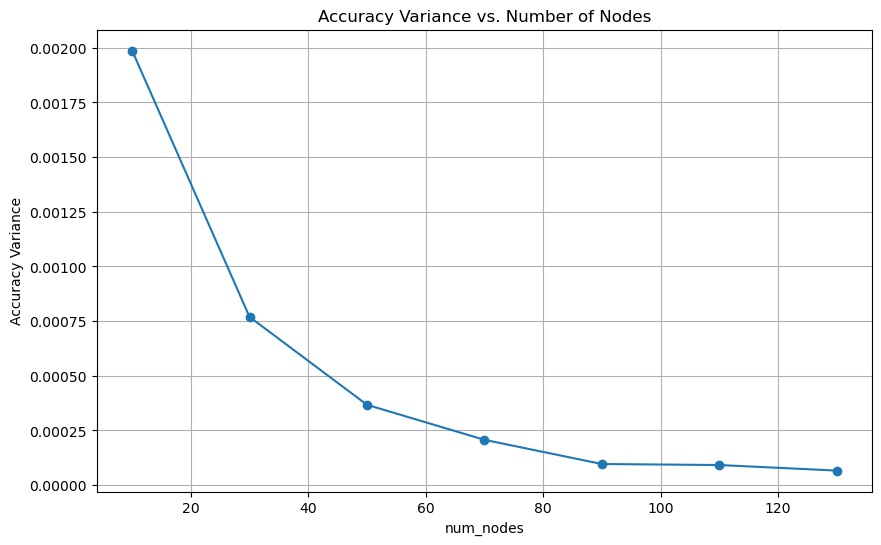

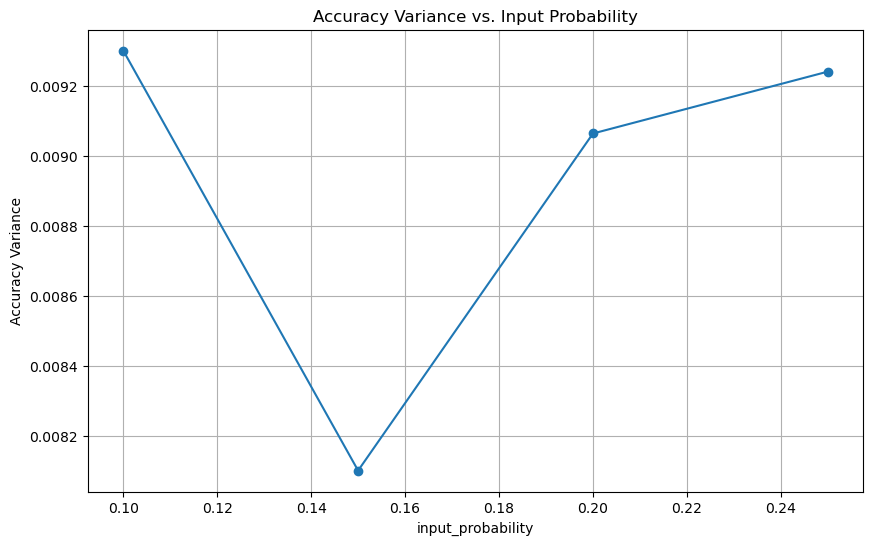

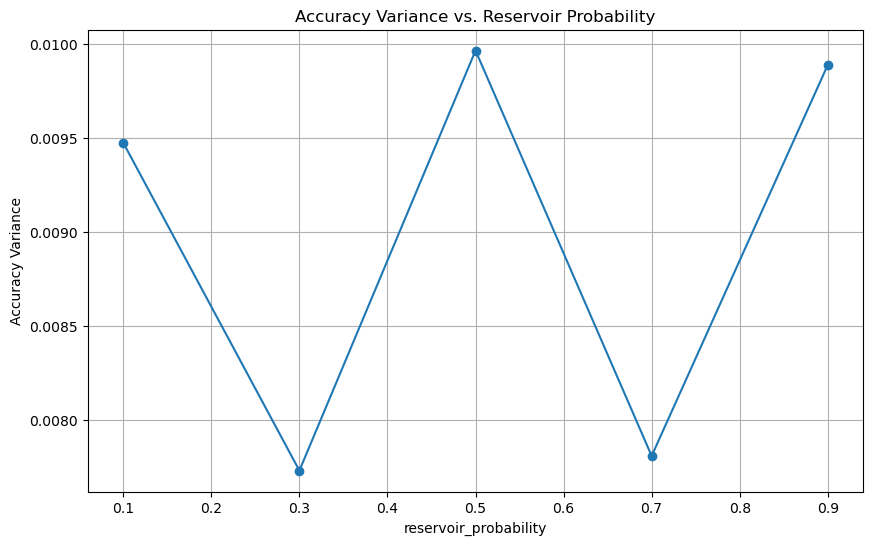

In [7]:
# =========== PLOT THE VARIANCE ============
# Plot variance for 'num_nodes'
rs.plot_accuracy_variance(df, ['num_nodes'], 'Accuracy Variance vs. Number of Nodes')

# Plot variance for 'input_probability'
rs.plot_accuracy_variance(df, ['input_probability'], 'Accuracy Variance vs. Input Probability')

# Plot variance for 'reservoir_probability'
rs.plot_accuracy_variance(df, ['reservoir_probability'], 'Accuracy Variance vs. Reservoir Probability')


   num_nodes  num_nodes_max_accuracy
0         10                0.771429
1         30                0.914286
2         50                0.942857
3         70                0.978571
4         90                0.978571
5        110                0.978571
6        130                0.985714


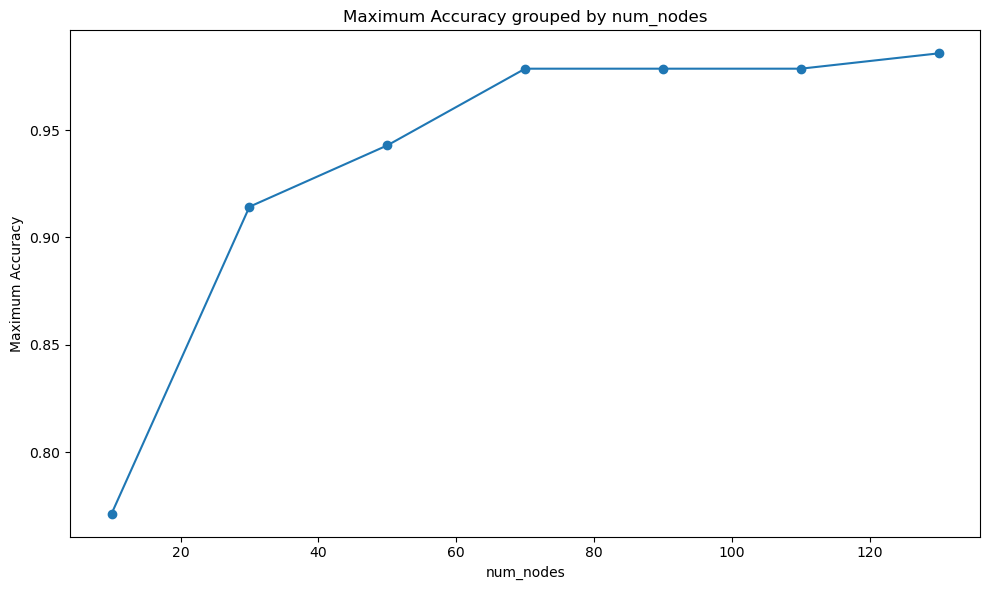

   input_probability  input_probability_max_accuracy
0               0.10                        0.985714
1               0.15                        0.978571
2               0.20                        0.985714
3               0.25                        0.978571


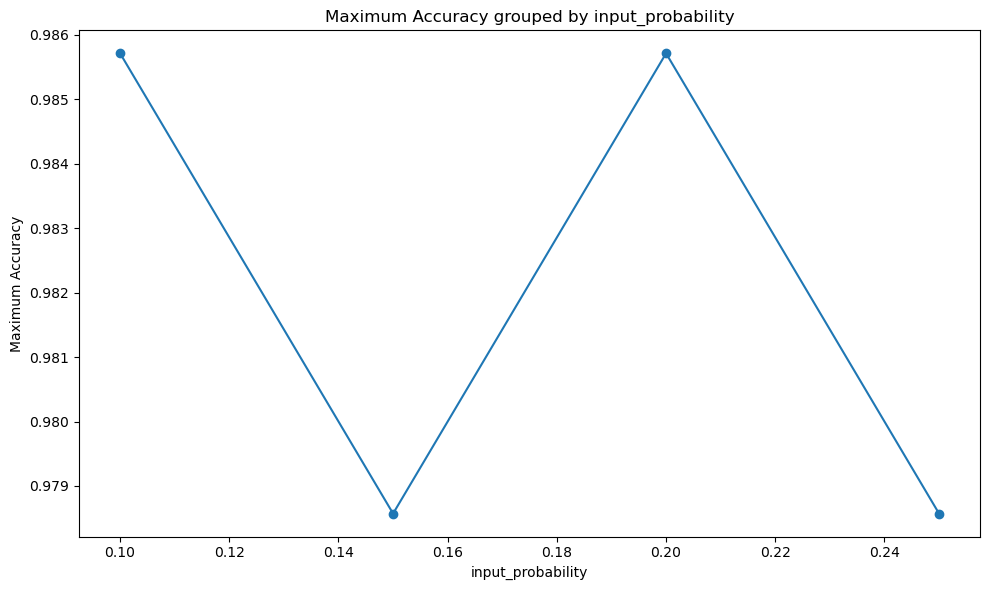

   reservoir_probability  reservoir_probability_max_accuracy
0                    0.1                            0.985714
1                    0.3                            0.985714
2                    0.5                            0.978571
3                    0.7                            0.978571
4                    0.9                            0.978571


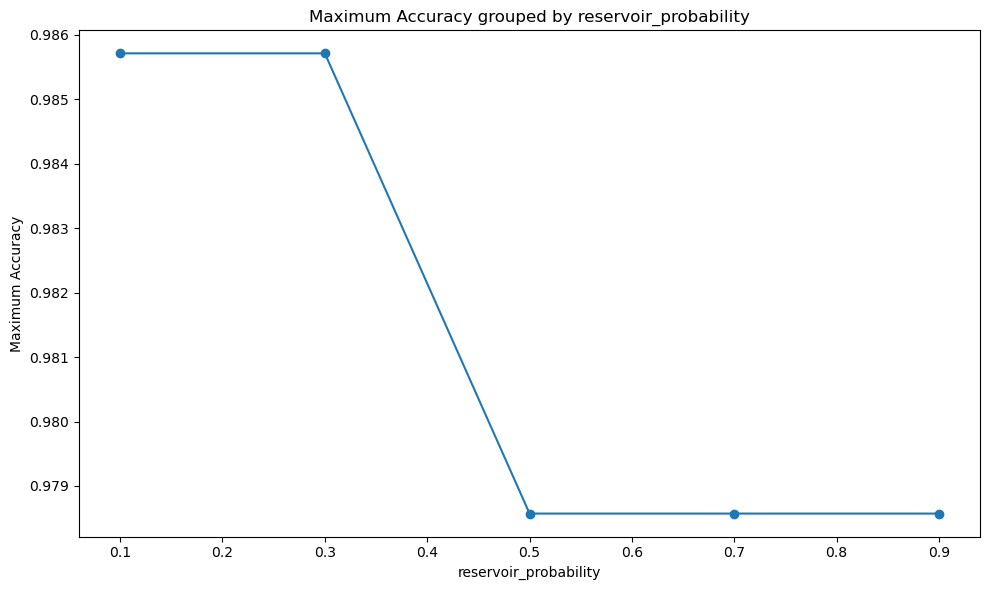

    filter_name  filter_name_max_accuracy
0  lowmultiunit                  0.985714
    filter_name  num_nodes  filter_name_num_nodes_max_accuracy
0  lowmultiunit         10                            0.771429
1  lowmultiunit         30                            0.914286
2  lowmultiunit         50                            0.942857
3  lowmultiunit         70                            0.978571
4  lowmultiunit         90                            0.978571
5  lowmultiunit        110                            0.978571
6  lowmultiunit        130                            0.985714


In [8]:
# =========== MAX ACCURACY WITH PLOTS ============
# Calculate max accuracy for 'num_nodes'
num_nodes_max_accuracy = rs.calculate_max_accuracy(df, ['num_nodes'])
print(num_nodes_max_accuracy)
rs.plot_max_accuracy(num_nodes_max_accuracy, ['num_nodes'])

# Calculate max accuracy for 'input_probability'
input_probability_max_accuracy = rs.calculate_max_accuracy(df, ['input_probability'])
print(input_probability_max_accuracy)
rs.plot_max_accuracy(input_probability_max_accuracy, ['input_probability'])

# Calculate max accuracy for 'reservoir_probability'
reservoir_probability_max_accuracy = rs.calculate_max_accuracy(df, ['reservoir_probability'])
print(reservoir_probability_max_accuracy)
rs.plot_max_accuracy(reservoir_probability_max_accuracy, ['reservoir_probability'])

# Calculate max accuracy for 'filter_name'
filter_name_max_accuracy = rs.calculate_max_accuracy(df, ['filter_name'])
print(filter_name_max_accuracy)

# Calculate max accuracy for multiple parameters
multi_param_max_accuracy = rs.calculate_max_accuracy(df, ['filter_name', 'num_nodes'])
print(multi_param_max_accuracy)

#### 1. Number of Nodes (`num_nodes`)

**Effect on Accuracy:**

    - Small Number of Nodes: Can lead to underfiiting since the model won't have capacity to capture dynamics of the data. So the accuracy would be small.
    - Large Number of Nodes: Improve the accuracy as it captures complex dynamics. However, it can lead to overfitting and computational complexity increases.
    - Expectation: Increasing the number of nodes can improve accuracy up to a certain point, beyond which the benefits may plateau or even degrade due to overfitting.
    - Observation: From the plot we can see that the highest change is from 10 to 30 nodes and within 70 nodes the model's accuracy doesn't increase much.

**Effect on Variance:**

    - Small Number of Nodes: The reservoir might not capture the dynamics of the input data effectively, leading to inconsistent performance and higher variance in accuracy.
    - Large Number of Nodes: As the number of nodes increases, the reservoir can capture more detailed temporal dynamics, which generally reduces variance by providing more stable performance across different runs. However, very large networks may introduce some variance due to overfitting and increased sensitivity to noise.
    - Expectation: Increasing the number of nodes tends to decrease the variance in accuracy up to a point, but overly large reservoirs can lead to higher variance due to overfitting.
    - Observation: Decresing accuracy variance with increasing number of nodes up to 90 nodes then it does not change drastically. The optimal value when it comes to number of nodes for this reservoir would be 70 due to the precision of the reservoir and the variance in the accuracy is not high at all.

#### 2. Input Probability (`input_probability`)

**Effect on Accuracy:**

    - Low Input Probability: Few input connections to the reservoir, leading to less information being propagated into the reservoir. This may cause the network to be less responsive to the input data.
    - High Input Probability: More input connections, potentially making the network more sensitive to input data. However, too high a probability may lead to excessive noise and destabilize the dynamics of the reservoir.
    - Expectation: Too low or too high values may degrade performance. A moderate value often works best to balance input sensitivity and noise.
    - Observation: We tested 4 different values and obtained the same accuracy for 0.1 and 0.2 input probability.

**Effect on Variance:**

    - Low Input Probability: Fewer connections between the input and the reservoir can result in some runs missing critical information, leading to higher variance in accuracy.
    - High Input Probability: More connections generally lead to better information transfer, but too high a probability can introduce noise, increasing variance.
    - Expectation: Both too low and too high values can increase variance.
    - Observation: There is an optimal range where the input probability minimizes accuracy variance, which in out case was value 0.15. We can also observe that there is a trade-off present with increasing accuracy and variance in accuracy.

#### 3. Reservoir Probability (`reservoir_probability`)

**Effect on Accuracy:**

    - Low Reservoir Probability: Sparse connections within the reservoir. This may lead to insufficient interaction between nodes, reducing the reservoir's ability to capture complex temporal patterns.
    - High Reservoir Probability: Dense connections within the reservoir, enhancing the ability to capture complex dynamics. However, very high probabilities can lead to overly complex dynamics that are difficult to interpret and may introduce chaotic behavior.
    - Expectation: Moderate reservoir probabilities often provide a good balance between complexity and stability.
    - Observation: Similar to input probability, there is usually an optimal range, which when it comes to accuracy it is 0.1 - 0.3 values.

**Effect on Variance:**

    - Low Reservoir Probability: Sparse connections can lead to insufficient interaction between nodes, causing high variance in performance across different runs due to the underutilization of the reservoir.
    - High Reservoir Probability: Dense connections usually reduce variance by ensuring robust internal dynamics, but very high connectivity can introduce chaotic behavior, increasing variance.
    - Expectation: Very sparse or very dense connections can increase variance.
    - Observation: Similarly as before, moderate reservoir probabilities typically minimize accuracy variance. Our values are 0.3 and 0.7. However, when comparing with the accuracy of the reservoir value 0.3 gave one of the highest accuracies. 